In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [5]:
#convert to datetime format
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [6]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [7]:
#day of month
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

In [8]:
#to get month
df['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [11]:
#to get week,it will give week of the year
df['order_placed_at'].dt.isocalendar().week 

0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: week, Length: 15000, dtype: UInt32

In [12]:
# to get week of the month
df['order_placed_at'].dt.isocalendar().week -8

0        1
1        1
2        1
3        1
4        1
        ..
14995    5
14996    5
14997    5
14998    5
14999    5
Name: week, Length: 15000, dtype: UInt32

In [13]:
#Day of week

df['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [14]:
df['dayofmonth']=df['order_placed_at'].dt.day

In [15]:
df['day_of_week']=df['order_placed_at'].dt.day_name()
df

,order_id,order_placed_at,order_delivered_at,dayofmonth,day_of_week
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,27,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,27,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,27,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,27,Monday


In [16]:
df['dayofmonth'].value_counts()

20    597
22    591
2     588
10    587
23    583
6     582
12    582
8     578
7     570
4     567
24    565
9     564
18    559
5     551
27    551
1     550
25    547
16    545
15    540
17    537
11    536
3     534
26    532
13    526
19    526
21    520
14    492
Name: dayofmonth, dtype: int64

<AxesSubplot:>

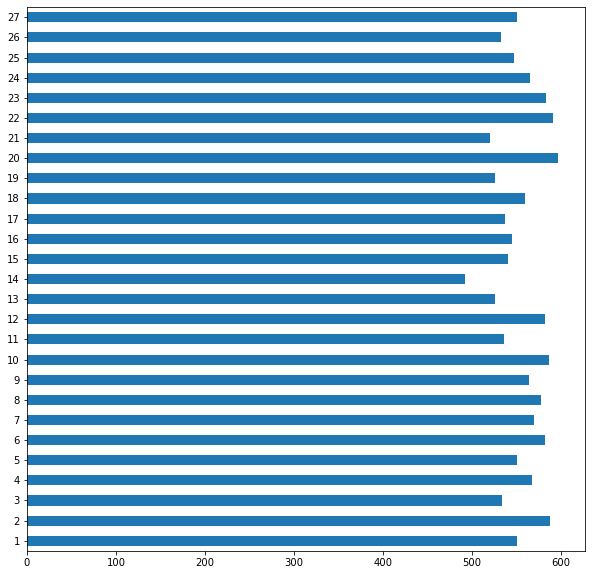

In [17]:
df['dayofmonth'].value_counts().sort_index().plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

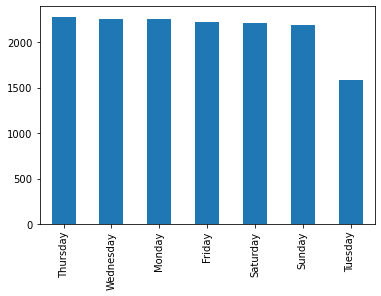

In [18]:
df['day_of_week'].value_counts().plot(kind='bar')

In [19]:
# Calculate delivery time in minutes
df['delivery_time']=df['order_delivered_at']-df['order_placed_at']
df.head()

,order_id,order_placed_at,order_delivered_at,dayofmonth,day_of_week,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,0 days 00:16:10.619056


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            15000 non-null  int64          
 1   order_placed_at     15000 non-null  datetime64[ns] 
 2   order_delivered_at  15000 non-null  datetime64[ns] 
 3   dayofmonth          15000 non-null  int64          
 4   day_of_week         15000 non-null  object         
 5   delivery_time       15000 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(1), timedelta64[ns](1)
memory usage: 703.2+ KB


In [21]:
df['delivery_time']=df['delivery_time'].dt.total_seconds()/60

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   dayofmonth          15000 non-null  int64         
 4   day_of_week         15000 non-null  object        
 5   delivery_time       15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 703.2+ KB


In [23]:
print(df['delivery_time'].mean())
print(df['delivery_time'].median())

20.499389326467746
15.797986066666668


In [24]:
print(df['delivery_time'].max())
print(df['delivery_time'].min())

7299.831374933334
15.000010333333334


In [25]:
df['delivery_time'].quantile(0.25)

15.274825995833334

<AxesSubplot:>

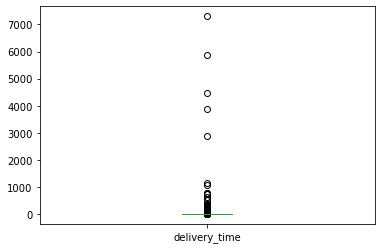

In [26]:
df['delivery_time'].plot(kind='box')

In [27]:
df.shape

(15000, 6)

In [28]:
df=df[df['delivery_time']<40]

<AxesSubplot:>

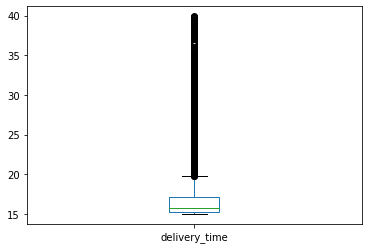

In [29]:
df['delivery_time'].plot(kind='box')

In [30]:
df['delivery_time'].quantile(0.95)

23.596276583333314

In [31]:
print(df['delivery_time'].mean())
print(df['delivery_time'].median())

16.992519561709482
15.763923250000001


In [32]:
df[df['delivery_time']>31].shape

(226, 6)

#### conclusion
Total 557 pizzas are delivered late.<br>
highest orders are placed on 27 march.<br>
lowest orders placed on 14 march.<br>
average delivery time is 20 mins.<br>
Average delivery time after removing outliers is 16 mins.<br>
95% of orders are delivered in 23 mins.